In [2]:
import hyperopt
print("hyperopt.__version__", hyperopt.__version__)
import sklearn
print("sklearn.__version__", sklearn.__version__)
#pip install scikit-learn==1.0.2  다운그레이드 해서 테스트하기
import pandas
print("pandas.__version__", pandas.__version__)
#pip install pandas==1.3.5
import xgboost
print("xgboost.__version__", xgboost.__version__)

hyperopt.__version__ 0.2.7
sklearn.__version__ 1.0.2
pandas.__version__ 1.3.5
xgboost.__version__ 1.5.0


In [3]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , precision_score, recall_score ,f1_score, roc_auc_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
# 개별 모델 로지스틱 회귀, KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델 소프트 보팅 기반 앙상블 모델 구현 분리기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],
                 voting= 'soft' #mean
                 )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassfier 학습/예측/평가
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
accuracy_score(y_test,pred)

0.956140350877193

In [5]:
# 개별 모델 학습/예측/평가

lr_clf1 = LogisticRegression(solver='liblinear')
lr_clf1.fit(X_train,y_train)
pred = lr_clf1.predict(X_test)
accuracy_score(y_test,pred)

0.9473684210526315

In [6]:
knn_clf1 = KNeighborsClassifier(n_neighbors=8)
knn_clf1.fit(X_train,y_train)
pred = knn_clf1.predict(X_test)
accuracy_score(y_test,pred)

c:\Users\LYJ\anaconda3\envs\xgboost_env\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9385964912280702

In [7]:


classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    Class_name = classifier.__class__.__name__
    print(accuracy_score(y_test,pred))

0.9473684210526315
0.9385964912280702


c:\Users\LYJ\anaconda3\envs\xgboost_env\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Human activity recognition data set

In [8]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [9]:
# feature_name_df = pd.read_csv('data/UCI HAR Dataset/features.txt', sep='\s+' , 
#                               header=None, names=['column_index','column_name'])

# new_feature_name_df = get_new_feature_name_df(feature_name_df)

# X_train = pd.read_csv('data/UCI HAR Dataset/train/X_train.txt')
# y_train = pd.read_csv('data/UCI HAR Dataset/test/X_test.txt')

In [10]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('data/UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('data/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('data/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('data/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('data/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

### 중복컬럼이름 정리 

In [11]:
X_train, X_test, y_train, y_test = get_human_dataset()

### 랜덤 포레스트

In [12]:
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test,pred)

C:\Users\LYJ\AppData\Local\Temp\ipykernel_23852\4061329974.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train,y_train)


0.9195792331184255

In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8,16,24],
    'min_samples_split' : [2,8,16],
    'min_samples_leaf' : [1,6,12]
}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs= -1)
grid_cv = GridSearchCV(rf_clf,param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

c:\Users\LYJ\anaconda3\envs\xgboost_env\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

In [14]:
grid_cv.best_params_, grid_cv.best_score_

({'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2},
 0.9164853101196953)

In [15]:
best_model = grid_cv.best_estimator_
best_pred = best_model.predict(X_test)
accuracy_score(y_test, best_pred)

0.9260264675941635

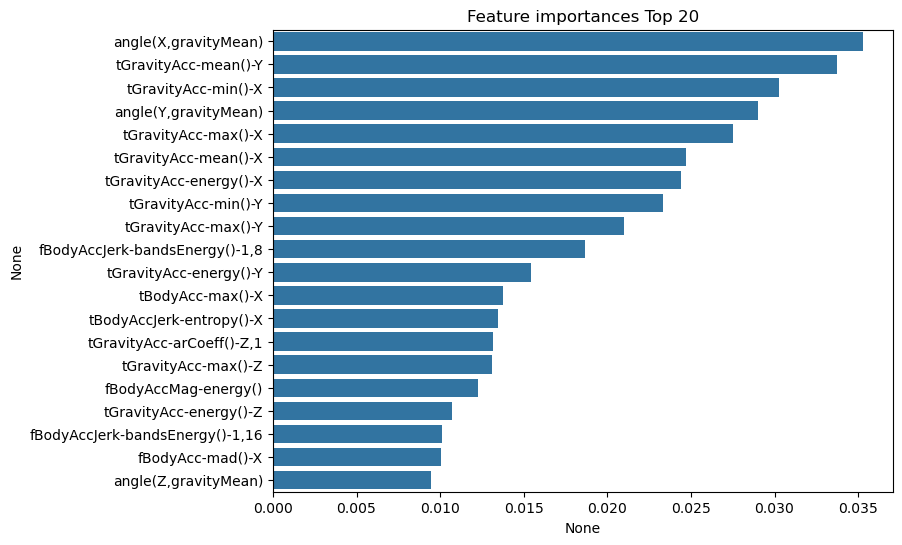

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = best_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### Gradient Boosting Machine GBM

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
import time

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time() #수행시간 측정

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred =gb_clf.predict(X_test)

print(accuracy_score(y_test, pred))
print(f'GBM 수행시간 : {time.time() - start_time}')

c:\Users\LYJ\anaconda3\envs\xgboost_env\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9195792331184255
GBM 수행시간 : 596.6660346984863


In [40]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [41]:
df['target'].value_counts()

KeyError: 'target'

In [42]:
#1. python native XGBoost
#2. sklearn.xgboost

In [43]:
# 데이터 분리

#훈련/테스트
X_train, X_test, y_train, y_test=train_test_split(X_features,y_label,test_size=0.2,random_state=156)

#훈련/검증
X_tr, X_val, y_tr, y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=156)


In [44]:
# 학습,검증,테스트 용 DMatrix 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [45]:
params = {
    'max_depth' : 3,
    'eta' : 0.05, # 학습률
    'objective' : 'binary:logistic', # 목적함수:이진 로지스틱
    'eval_metric' : 'logloss'
}
num_rounds = 400 # 부스팅 반복 횟수

In [46]:
eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds,
            early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

In [48]:
pred_probs = xgb_model.predict(dtest)
pred_probs

array([0.8447872 , 0.00842587, 0.6796298 , 0.08113331, 0.9751338 ,
       0.9988939 , 0.9983084 , 0.9980654 , 0.99637896, 0.00138468,
       0.00252283, 0.00154995, 0.99780875, 0.99829525, 0.99691856,
       0.9965521 , 0.99120796, 0.9982718 , 0.9970682 , 0.9978916 ,
       0.00202923, 0.10774372, 0.00137198, 0.9989255 , 0.00107862,
       0.7800014 , 0.00295459, 0.00154995, 0.9966723 , 0.05379276,
       0.958738  , 0.00149019, 0.9700533 , 0.8656249 , 0.00678389,
       0.00140975, 0.97810876, 0.99713576, 0.24059245, 0.9972307 ,
       0.35760084, 0.99708337, 0.9919429 , 0.99659145, 0.9962838 ,
       0.9179466 , 0.036952  , 0.997417  , 0.99325067, 0.99804085,
       0.99648905, 0.00236221, 0.9979361 , 0.99784875, 0.9960328 ,
       0.99391055, 0.9984106 , 0.99635327, 0.9967404 , 0.896291  ,
       0.9967794 , 0.9520696 , 0.00349248, 0.00202715, 0.9980167 ,
       0.98225844, 0.00349248, 0.99056447, 0.9972249 , 0.9978916 ,
       0.00297725, 0.99731344, 0.00163038, 0.98887384, 0.99624

### 예측 클래스값 확인

In [49]:
preds =  [ 1 if x > 0.5 else 0 for x in pred_probs ]
preds[:10]

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [50]:
# get_clf-eval

In [51]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    roc_auc = roc_auc_score(y_test, pred_proba)
    print(confusion)
    print(accuracy, precision, recall, f1, roc_auc)

In [52]:
get_clf_eval(y_test, preds, pred_probs)

[[34  3]
 [ 2 75]]
0.956140350877193 0.9615384615384616 0.974025974025974 0.967741935483871 0.9936819936819937


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

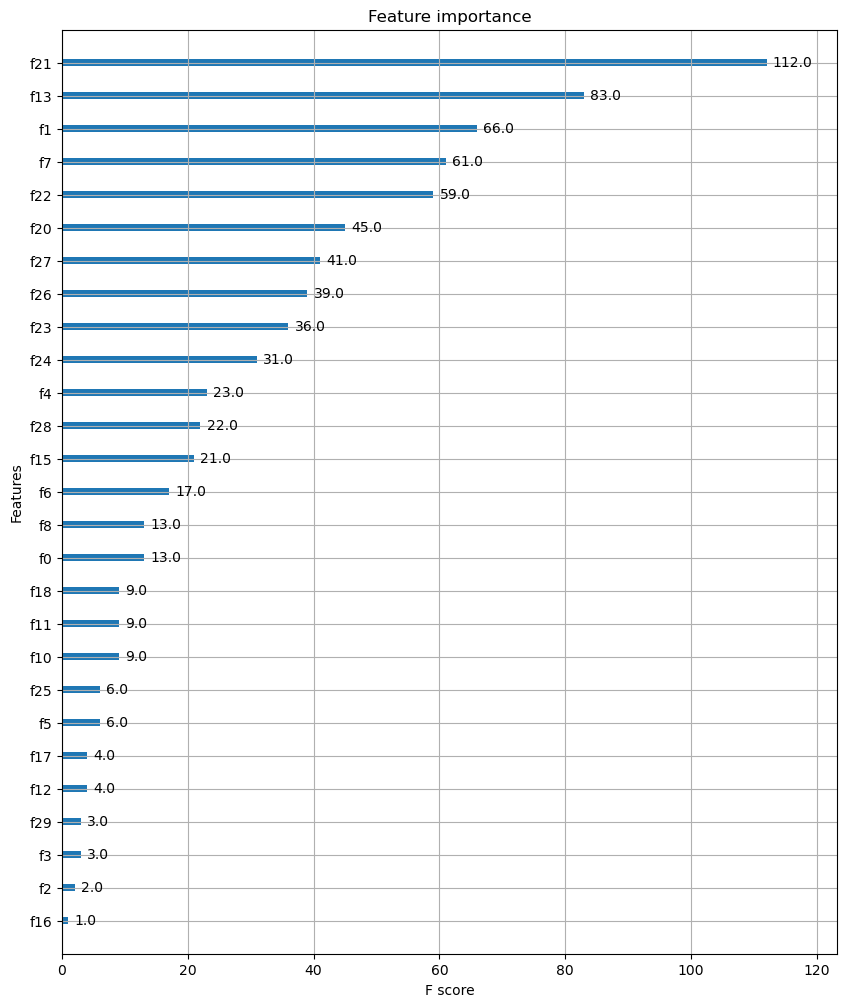

In [53]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

### sklearn - xgboost

In [54]:
params = {
    'max_depth' : 3,
    'eta' : 0.05, # 학습률
    'objective' : 'binary:logistic', # 목적함수:이진 로지스틱
    'eval_metric' : 'logloss'
}

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb_wrapper_model = XGBClassifier(n_estimators = 400, learning_rate=0.05, max_depth=3)
xgb_wrapper_model.fit(X_train,y_train)
wr_pred = xgb_wrapper_model.predict(X_test)
wr_pred_proba = xgb_wrapper_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, wr_pred, wr_pred_proba)


[11:00:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[34  3]
 [ 1 76]]
0.9649122807017544 0.9620253164556962 0.987012987012987 0.9743589743589742 0.9954369954369954


c:\Users\LYJ\anaconda3\envs\xgboost_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
from lightgbm import LGBMClassifier

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data= dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

#1단계 학습80, 테스트20
X_train,X_test,y_train,y_test = train_test_split(X_features,y_label, test_size=0.2, random_state=156)
#2단계 학습90 검증10
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train, test_size=0.1, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

#훈련용,검증용 데이터 평가 목록
eval_list = [(X_tr, y_tr),(X_val,y_val)]
lgbm_wrapper.fit(X_tr,y_tr, 
                 early_stopping_rounds=50, eval_metric="logloss",
                 eval_set=eval_list, verbose=True)

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

c:\Users\LYJ\anaconda3\envs\xgboost_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\LYJ\anaconda3\envs\xgboost_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.05, n_estimators=400)

In [67]:
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test,preds,pred_proba)

[[34  3]
 [ 2 75]]
0.956140350877193 0.9615384615384616 0.974025974025974 0.967741935483871 0.9877149877149878


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

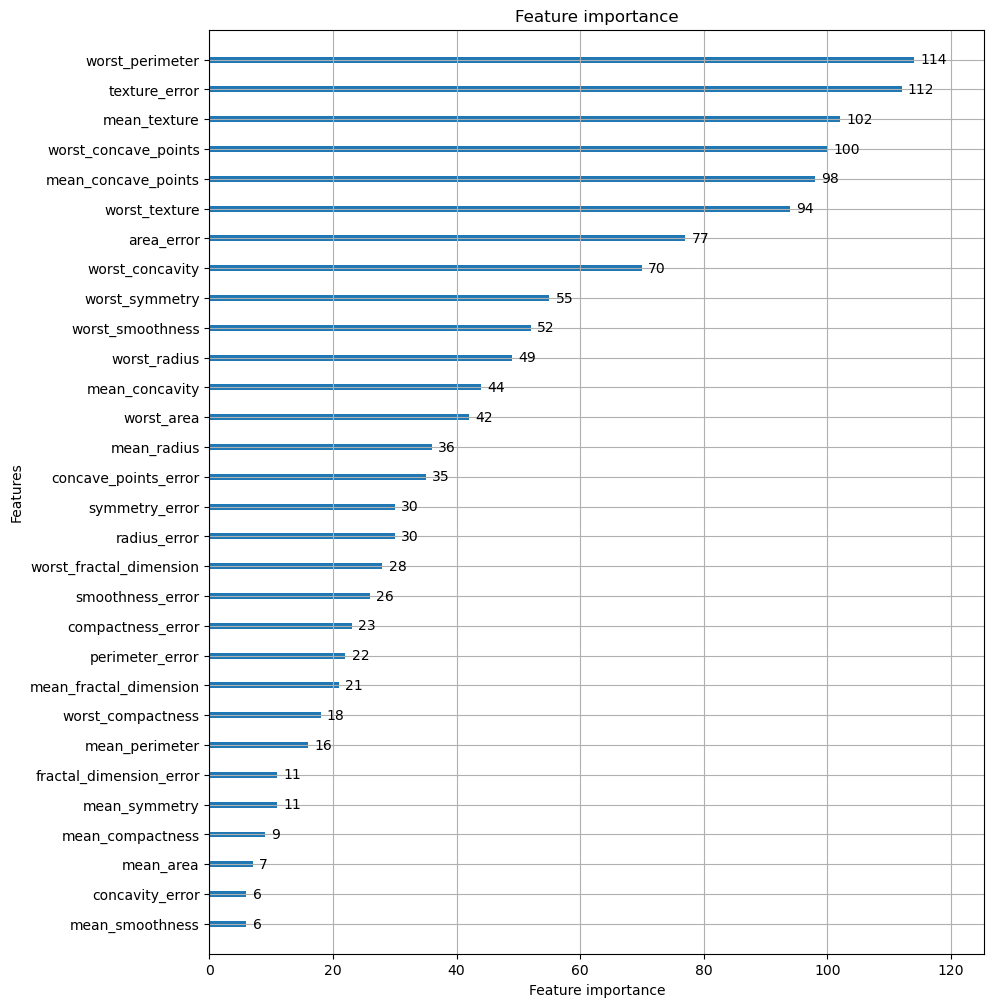

In [64]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)